In [1]:
import os
wd= 'C:/Users/Phil/Documents/GitHub/hbv-globalinvcase'#set own working directory
os.chdir(wd)

import atomica as at
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hbv_functions as hbv

In [2]:
%matplotlib inline  

In [3]:
regions = ['AFR', 'AMR', 'EMR', 'EUR', 'SEAR', 'WPR']
edf = hbv.error_table(regions)

Current region: AFR
Elapsed time for running "default": 2.04s
Current region: AMR
Elapsed time for running "default": 2.06s
Current region: EMR
Elapsed time for running "default": 2.05s
Current region: EUR
Elapsed time for running "default": 2.05s
Current region: SEAR
Elapsed time for running "default": 2.06s
Current region: WPR
Elapsed time for running "default": 2.04s


In [4]:
edf

,chb_pop,cl_acu,cl_cir,cl_hcc
AFR,0.2775,0.1165,0.1263,0.2608
AMR,0.3327,0.1812,0.1710,0.2207
EMR,0.2505,0.0939,0.2606,0.1939
EUR,0.1661,0.2912,0.3461,0.1246
SEAR,0.2642,0.2118,0.1701,0.3492
WPR,0.3376,0.3925,0.2479,0.2237


In [5]:
hbv.determine_cal_quality(edf)

,chb_pop,cl_acu,cl_cir,cl_hcc
AFR,0.277500,0.116500,0.126300,0.260800
AMR,0.332700,0.181200,0.171000,0.220700
EMR,0.250500,0.093900,0.260600,0.193900
EUR,0.166100,0.291200,0.346100,0.124600
SEAR,0.264200,0.211800,0.170100,0.349200
WPR,0.337600,0.392500,0.247900,0.223700


### Plot Results to compare

Elapsed time for running "default": 2.17s


[<Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>]

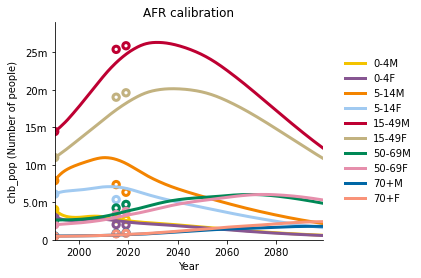

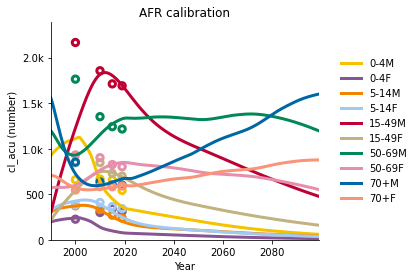

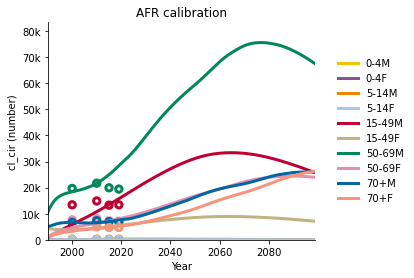

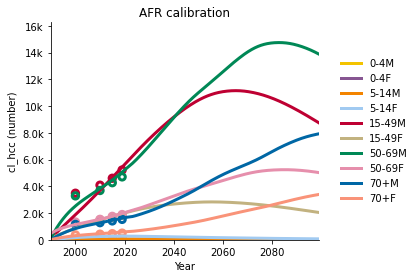

In [12]:
ct = 'AFR'
loc = f"valuations/vimc/"
fw = 'frameworks/hbv_v14_gamma_mav.xlsx'
F = at.ProjectFramework(fw)
D = at.ProjectData.from_spreadsheet(f"applications/region_{ct.lower()}/{ct}_db_mav.xlsx", framework=F)
P= at.Project(framework=F, databook=D, sim_dt=0.25, sim_start=1990, sim_end=2099, do_run=False)
cal = P.make_parset()
cal.load_calibration(f"applications/region_{ct.lower()}/{ct}_calib.xlsx")
res = P.run_sim(parset=cal, result_name = f'{ct} calibration')

d=at.PlotData([res], outputs=['chb_pop', 'cl_acu', 'cl_cir', 'cl_hcc'])
at.plot_series(d, data=P.data, axis="pops")